# Crime Data Model Training and Comparison

This notebook trains and compares linear regression, decision tree, and random forest models for predicting crime fatal status.

## 1. Import Libraries
Import pandas, numpy, matplotlib, scikit-learn modules, and joblib.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## 2. Load Processed Data
Load the processed crime data for modeling.

In [24]:
# Load processed data
df = pd.read_csv('crime_data_balanced.csv')
df = df.dropna(subset=['Victim_Fatal_Status'])
print("Rows after dropping NaN:", len(df))
print("Columns:", df.columns)
print("Sample data:\n", df.head())

# Features and target
X = df.drop('Victim_Fatal_Status', axis=1)
y = df['Victim_Fatal_Status']

## 3. Train/Test Split
Split the data into training and testing sets.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## 4. Train and Compare Models
Train Linear Regression, SGDRegressor, Decision Tree, and Random Forest models. Evaluate and compare their performance.

In [19]:
models = {
    'LinearRegression': LinearRegression(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_loss = mean_squared_error(y_train, y_pred_train)
    test_loss = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results[name] = {'train_loss': train_loss, 'test_loss': test_loss, 'r2': r2, 'model': model}
    print(f"{name}: Train Loss={train_loss:.4f}, Test Loss={test_loss:.4f}, R2={r2:.4f}")
    # Plot loss curve
    plt.figure()
    plt.plot(y_test.values, y_pred_test, 'o', label='Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Test Set Predictions')
    plt.legend()
    plt.show()

ValueError: Input y contains NaN.

## 5. Visualize Best Model Performance
Plot a scatter plot of actual vs predicted values for the best-performing model.

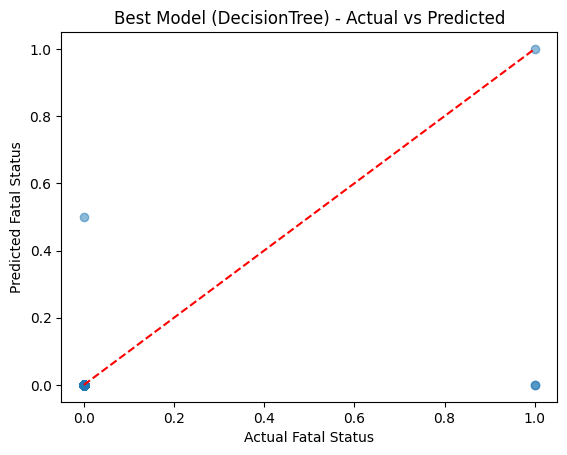

In [ ]:
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('Actual Fatal Status')
plt.ylabel('Predicted Fatal Status')
plt.title(f'Best Model ({best_model_name}) - Actual vs Predicted')
plt.show()

## 6. Save Best Model
Save the best-performing model for use in the API.

In [ ]:
joblib.dump(best_model, 'API/best_crime_model.pkl')
print(f'Best model ({best_model_name}) saved as best_crime_model.pkl')

Best model (DecisionTree) saved as best_crime_model.pkl
